# Algoritmo de detecção de objetos

In [137]:
import cv2
import matplotlib.pyplot as plt


Carregando modelo pre-treinado

In [138]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

Algoritmo detecta a imagem

In [139]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)
classLabels = [] 
file_name = "labels.txt"
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [140]:
print(classLabels[17])

horse


In [141]:
print(len(classLabels))

80


Configuração do modelo utilizado

In [142]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7fbcac429c10>

Lendo uma imagem

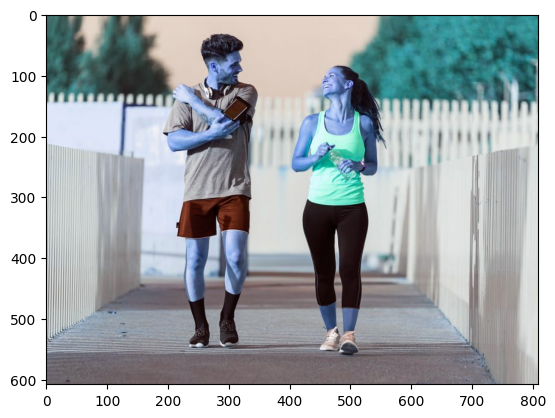

In [143]:
img = cv2.imread('pessoas.jpg')
plt.imshow(img)

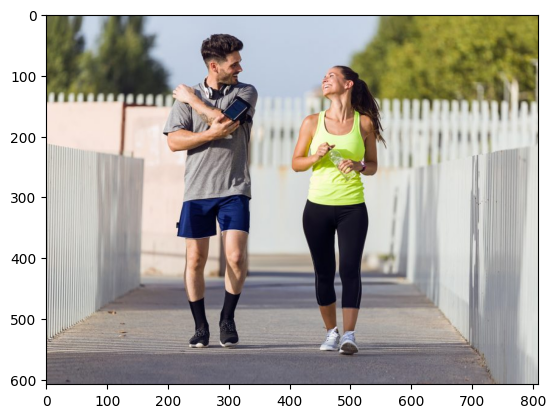

In [144]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [145]:
ClassIndex, confidece, bbox = model.detect(img, confThreshold=0.5)
print(ClassIndex)

[1 1]


In [146]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

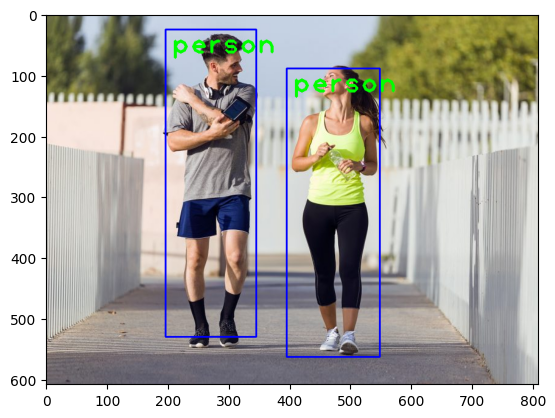

In [147]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))